# Google Drive'a Bağlanma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)
!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 8194, done.
remote: Counting objects: 100% (1800/1800), done.
remote: Compressing objects: 100% (958/958), done.
remote: Total 8194 (delta 1079), reused 1278 (delta 818), pack-reused 6394
Receiving objects: 100% (8194/8194), 5.96 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (5422/5422), done.
  Preparing metadata (setup.py) ... done


# Train


In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/supernova-dataset-v8/yolov8n.pt \
data=/content/drive/MyDrive/supernova-dataset-v8/custom.yaml \
epochs=300 imgsz=640 batch=64 cache=True

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/supernova-dataset-v8/yolov8n.pt, data=/content/drive/MyDrive/supernova-dataset-v8/custom.yaml, epochs=300, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

# Test

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/supernova-dataset-v8/custom.yaml" split=test

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/supernova-dataset-v8/test/labels... 600 images, 0 backgrounds, 0 corrupt: 100% 600/600 [01:56<00:00,  5.13it/s]
val: New cache created: /content/drive/MyDrive/supernova-dataset-v8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:10<00:00,  3.58it/s]
                   all        600        601      0.819      0.792      0.877      0.702
Speed: 1.0ms preprocess, 5.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/supernova-dataset-v8/custom.yaml"

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/supernova-dataset-v8/val/labels.cache... 300 images, 0 backgrounds, 1 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:06<00:00,  2.86it/s]
                   all        300        301      0.826       0.79      0.863      0.712
Speed: 2.3ms preprocess, 6.6ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val0002


# Images

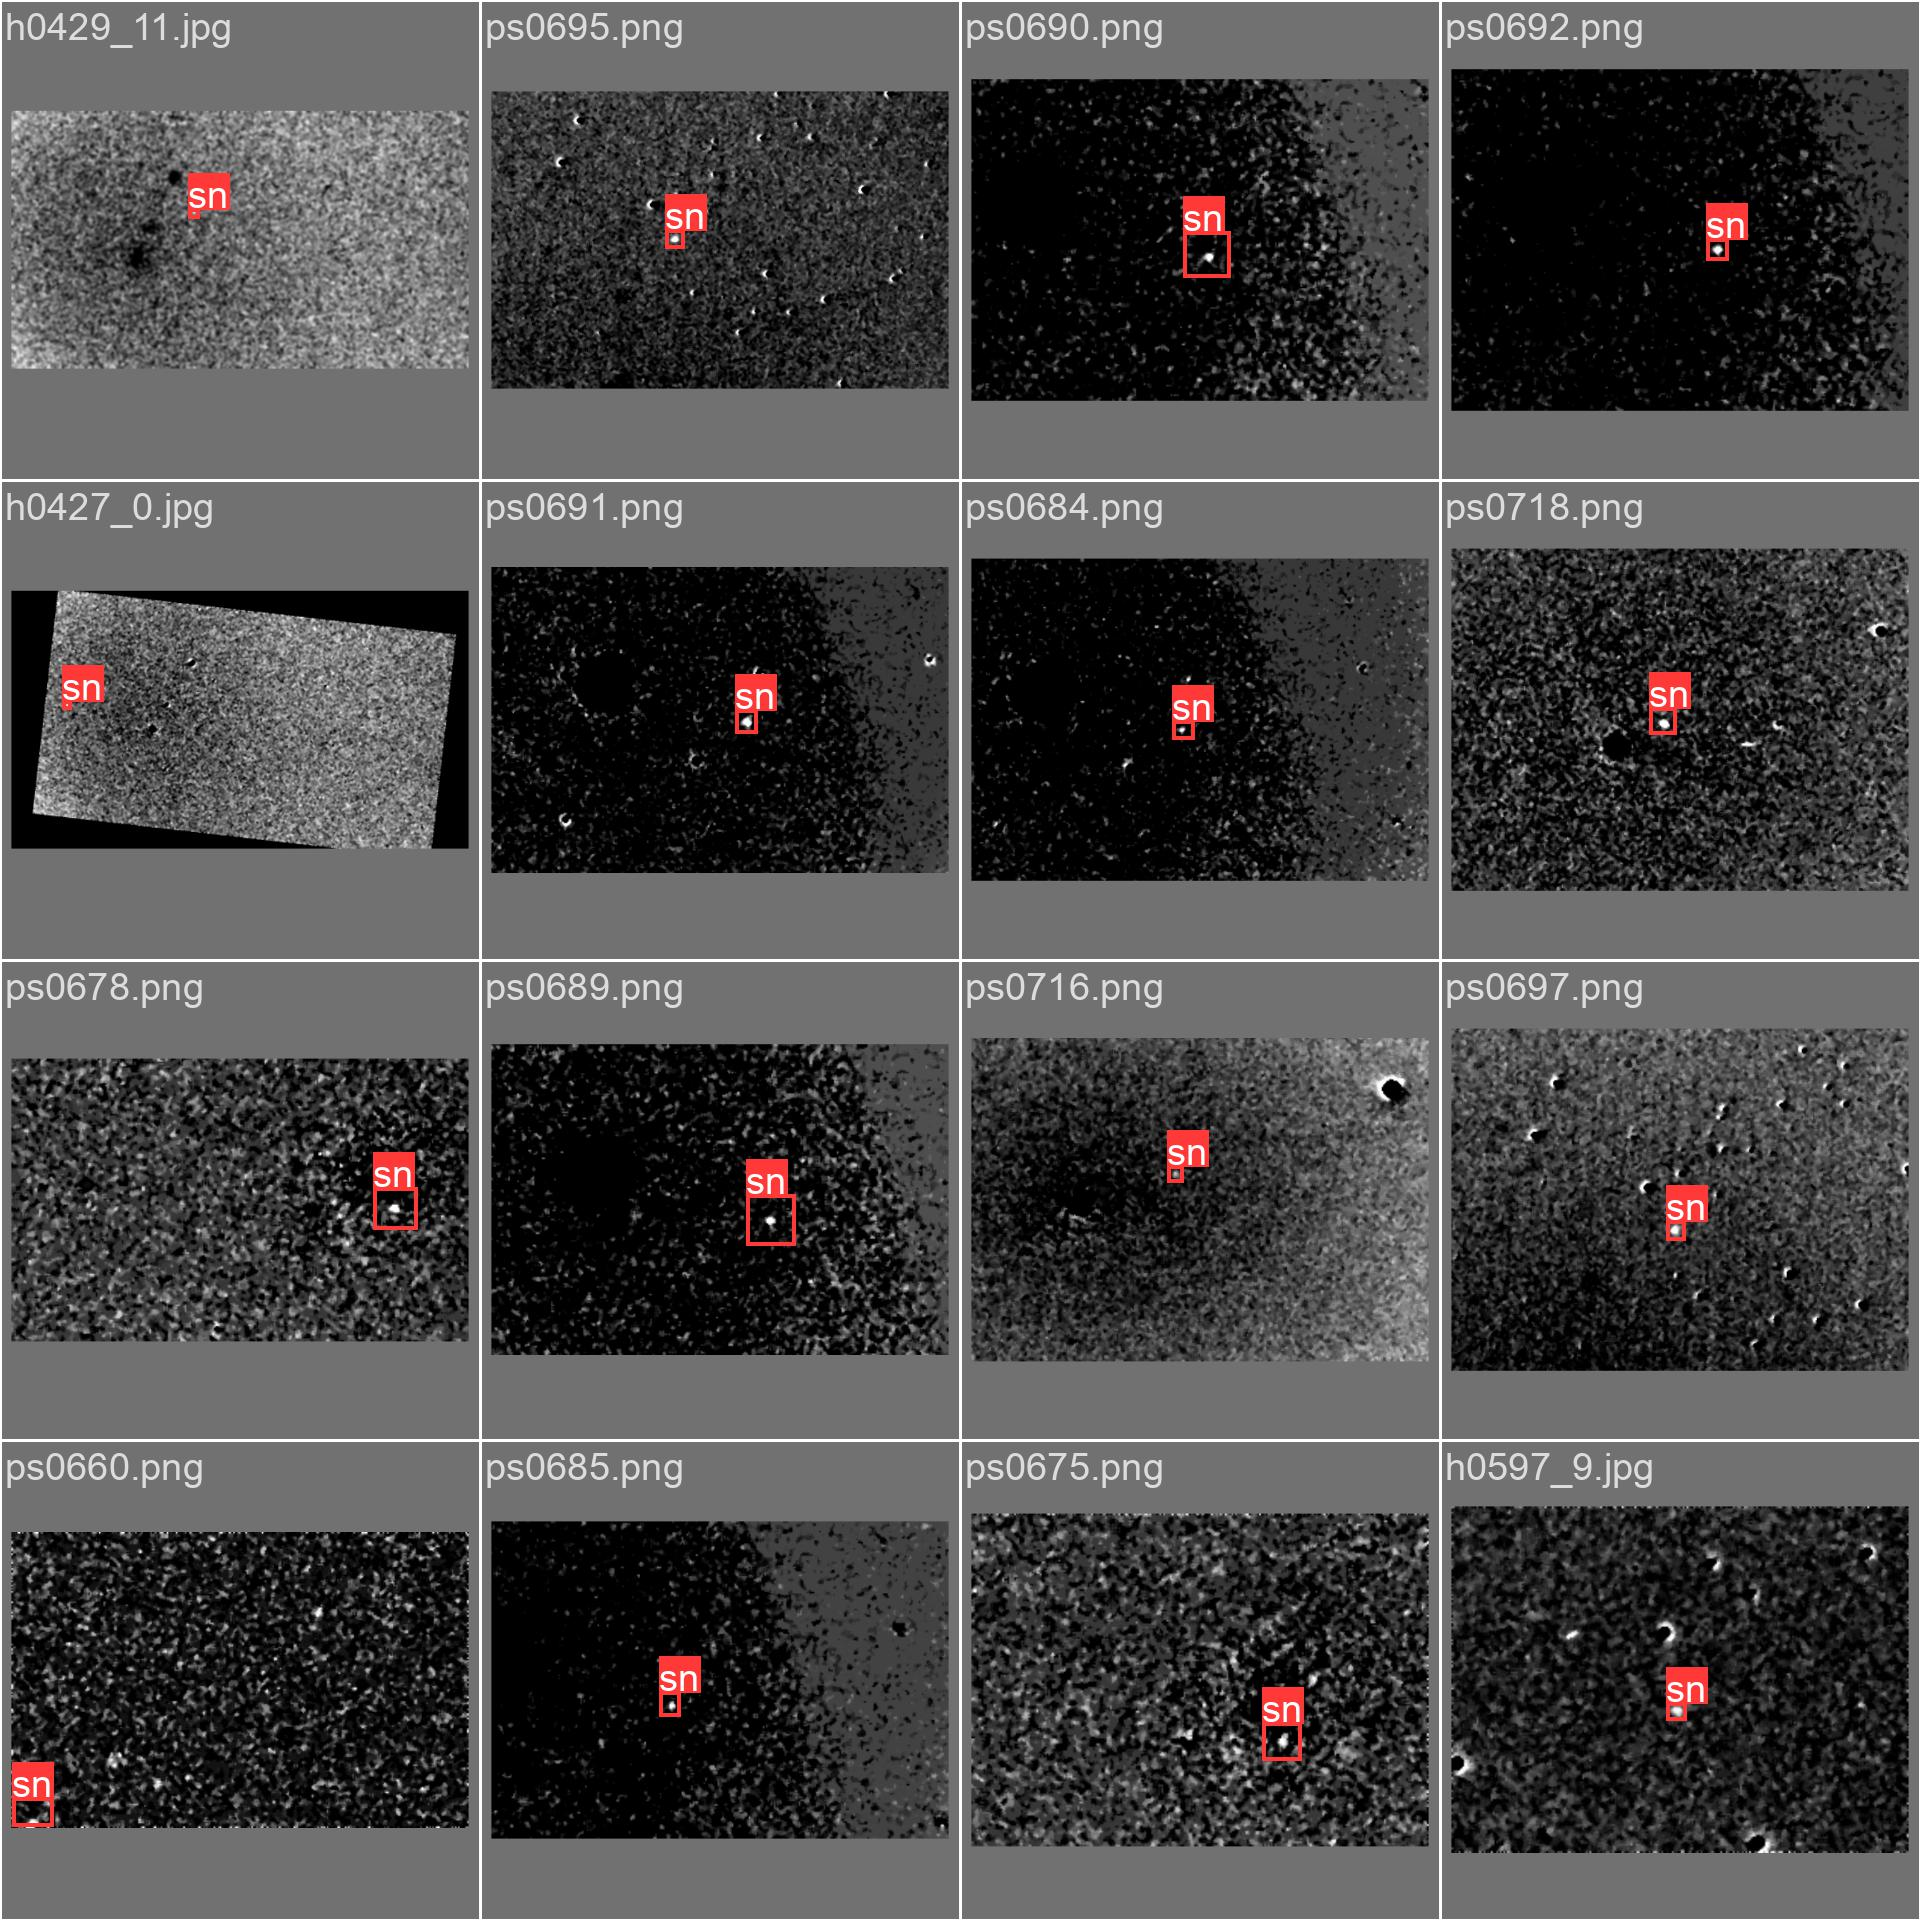

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=700)  # view results.png

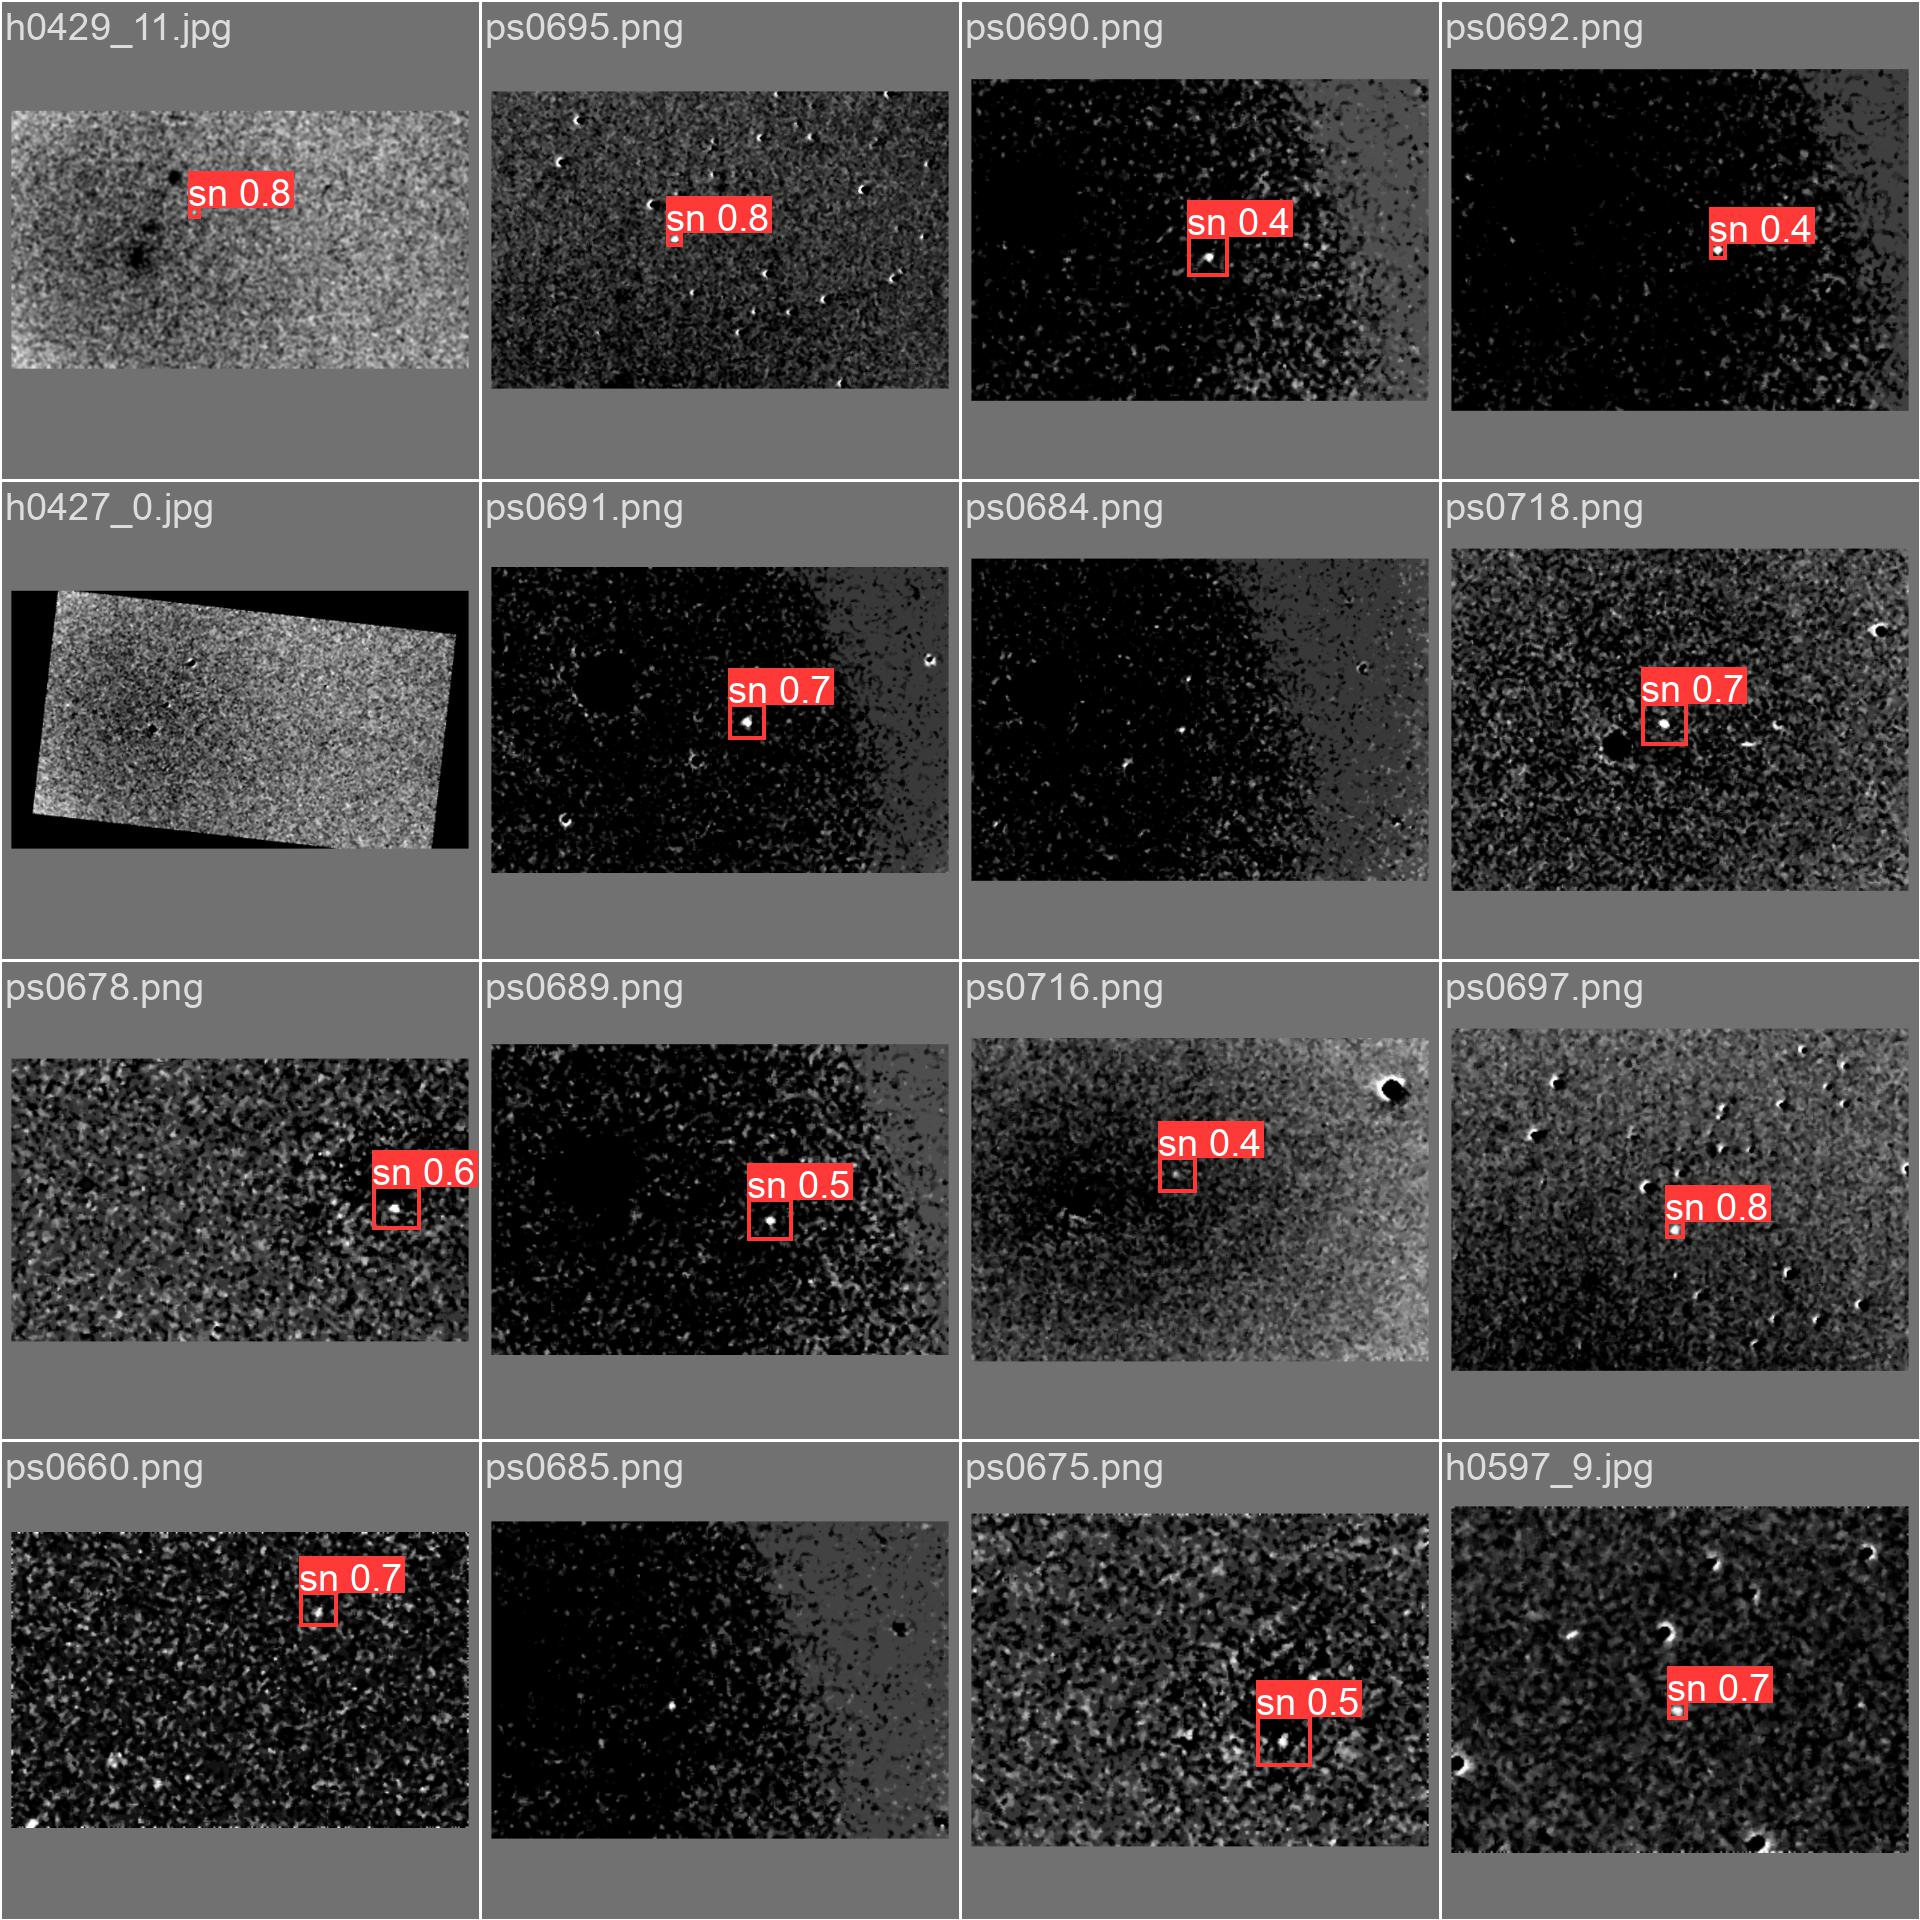

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=700)  # view results.png

In [ ]:
!zip -r /content/val.zip /content/runs/detect/val

In [ ]:
from google.colab import files
files.download("/content/val.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/train.zip /content/runs/detect/train

In [ ]:
from google.colab import files
files.download("/content/train.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>